In [1]:
import os
from astropy.table import Table
import time
import dictionaries
import params
import debias

In [2]:
import astropy
import astropy.units as u
import numpy as np

In [6]:
data = Table.read(params.data_file)
output_directory = params.output_directory

if not os.path.isdir(output_directory):
    os.mkdir(output_directory)

In [15]:
data

nsa_id,R_50_kpc,petroth50,r_mag,survey,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_count_fraction,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_weight_fraction,t01_smooth_or_features_a02_features_or_disk_count,t01_smooth_or_features_a02_features_or_disk_count_fraction,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_weight_fraction,t01_smooth_or_features_a03_star_or_artifact_count,t01_smooth_or_features_a03_star_or_artifact_count_fraction,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_weight_fraction,t01_smooth_or_features_count,t01_smooth_or_features_weight,t02_edgeon_a04_yes_count,t02_edgeon_a04_yes_count_fraction,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_weight_fraction,t02_edgeon_a05_no_count,t02_edgeon_a05_no_count_fraction,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_weight_fraction,t02_edgeon_count,t02_edgeon_weight,t03_bar_a06_bar_count,t03_bar_a06_bar_count_fraction,t03_bar_a06_bar_weight,t03_bar_a06_bar_weight_fraction,t03_bar_a07_no_bar_count,t03_bar_a07_no_bar_count_fraction,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_weight_fraction,t03_bar_count,t03_bar_weight,t04_spiral_a08_spiral_count,t04_spiral_a08_spiral_count_fraction,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_weight_fraction,t04_spiral_a09_no_spiral_count,t04_spiral_a09_no_spiral_count_fraction,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_weight_fraction,t04_spiral_count,t04_spiral_weight,t05_bulge_prominence_a10_no_bulge_count,t05_bulge_prominence_a10_no_bulge_count_fraction,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_weight_fraction,t05_bulge_prominence_a11_just_noticeable_count,t05_bulge_prominence_a11_just_noticeable_count_fraction,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_weight_fraction,t05_bulge_prominence_a12_obvious_count,t05_bulge_prominence_a12_obvious_count_fraction,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_weight_fraction,t05_bulge_prominence_a13_dominant_count,t05_bulge_prominence_a13_dominant_count_fraction,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_weight_fraction,t05_bulge_prominence_count,t05_bulge_prominence_weight,t06_odd_a14_yes_count,t06_odd_a14_yes_count_fraction,t06_odd_a14_yes_weight,t06_odd_a14_yes_weight_fraction,t06_odd_a15_no_count,t06_odd_a15_no_count_fraction,t06_odd_a15_no_weight,t06_odd_a15_no_weight_fraction,t06_odd_count,t06_odd_weight,t07_rounded_a16_completely_round_count,t07_rounded_a16_completely_round_count_fraction,t07_rounded_a16_completely_round_weight,t07_rounded_a16_completely_round_weight_fraction,t07_rounded_a17_in_between_count,t07_rounded_a17_in_between_count_fraction,t07_rounded_a17_in_between_weight,t07_rounded_a17_in_between_weight_fraction,t07_rounded_a18_cigar_shaped_count,t07_rounded_a18_cigar_shaped_count_fraction,t07_rounded_a18_cigar_shaped_weight,t07_rounded_a18_cigar_shaped_weight_fraction,t07_rounded_count,t07_rounded_weight,t09_bulge_shape_a25_rounded_count,t09_bulge_shape_a25_rounded_count_fraction,t09_bulge_shape_a25_rounded_weight,t09_bulge_shape_a25_rounded_weight_fraction,t09_bulge_shape_a26_boxy_count,t09_bulge_shape_a26_boxy_count_fraction,t09_bulge_shape_a26_boxy_weight,t09_bulge_shape_a26_boxy_weight_fraction,t09_bulge_shape_a27_no_bulge_count,t09_bulge_shape_a27_no_bulge_count_fraction,t09_bulge_shape_a27_no_bulge_weight,t09_bulge_shape_a27_no_bulge_weight_fraction,t09_bulge_shape_count,t09_bulge_shape_weight,t10_arms_winding_a28_tight_count,t10_arms_winding_a28_tight_count_fraction,t10_arms_winding_a28_tight_weight,t10_arms_winding_a28_tight_weight_fraction,t10_arms_winding_a29_medium_count,t10_arms_winding_a29_medium_count_fraction,t10_arms_winding_a29_medium_weight,t10_arms_winding_a29_medium_weight_fraction,t10_arms_winding_a30_loose_count,t10_arms_winding_a30_loose_count

In [7]:
x = np.unique(data['survey'], return_counts=True)

In [8]:
x = Table(x, names=('survey', 'count'))

In [9]:
x.sort('count',)

In [10]:
x[:90:-1]

survey,count
str119,int64
original,196027
sloan,23176
extra,19832
sdss_lost_set,15115
stripe82,8268
"stripe82,stripe82",7541
"sdss_lost_set,original",7448
"sloan,sloan",6704
"sloan,sloan,sloan",2243


In [11]:
for q in dictionaries.questions.keys():
    answers = dictionaries.questions[q]['answers']
    for a in answers:
        print('---------------------------------------------')
        print('Q: {}'.format(q))
        print('A: {}'.format(a))
        print('---------------------------------------------')

---------------------------------------------
Q: t01_smooth_or_features
A: a01_smooth
---------------------------------------------
---------------------------------------------
Q: t01_smooth_or_features
A: a02_features_or_disk
---------------------------------------------
---------------------------------------------
Q: t01_smooth_or_features
A: a03_star_or_artifact
---------------------------------------------
---------------------------------------------
Q: t02_edgeon
A: a04_yes
---------------------------------------------
---------------------------------------------
Q: t02_edgeon
A: a05_no
---------------------------------------------
---------------------------------------------
Q: t03_bar
A: a06_bar
---------------------------------------------
---------------------------------------------
Q: t03_bar
A: a07_no_bar
---------------------------------------------
---------------------------------------------
Q: t04_spiral
A: a08_spiral
---------------------------------------------


In [12]:
%matplotlib inline
from matplotlib import pyplot as plt

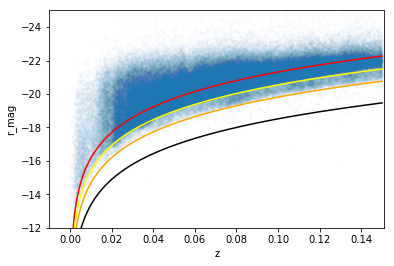

In [13]:
plt.plot(data['z'], data['r_mag'], '.', mec='none', alpha=0.01)
plt.xlabel('z')
plt.ylabel('r_mag')
plt.axis(xmin=-0.01, xmax=0.151, ymin=-12, ymax=-25)
z = np.linspace(0.001, 0.15, 1000)
C = astropy.cosmology.FlatLambdaCDM(70, 0.3)
dm = C.distmod(z).to_value()
plt.plot(z, 17 - dm, 'red');
plt.plot(z, 17.77 - dm, 'yellow');
plt.plot(z, 18.5 - dm, 'orange');
plt.plot(z, 19.8 - dm, 'black');

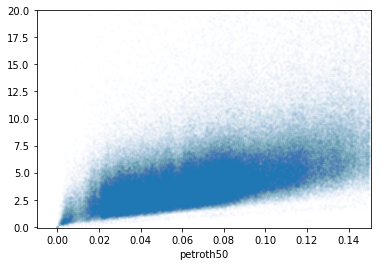

In [18]:
plt.plot(data['z'], data['R_50_kpc'], '.', mec='none', alpha=0.01)
plt.xlabel('z')
plt.xlabel('petroth50')
plt.axis(xmin=-0.01, xmax=0.151, ymin=-0.1, ymax=20);

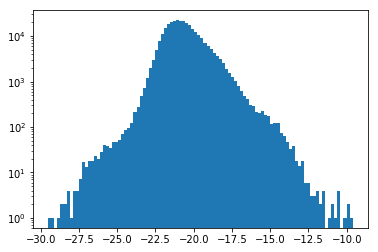

In [31]:
plt.hist(data['r_mag'], bins=100, log=True);

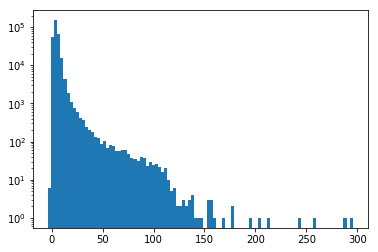

In [29]:
plt.hist(data['R_50_kpc'], bins=100, log=True);

In [20]:
print(data[data['r_mag'] > -10])

nsa_id        R_50_kpc       ... t11_arms_number_a37_cant_tell_debiased
------ --------------------- ... --------------------------------------
  6720  0.007863245993373765 ...                                   10.0
 11173     2.559113958640356 ...                                    1.0
 64202     3.680401785497822 ...                                    0.0
104953     3.936410534204868 ...                                    0.0
300728    0.5846760226375048 ...                                   10.0
474783     3.672369237522675 ...                                    1.0
696044                   0.0 ...                                    0.0
698564 -0.015913656961832903 ...                                    0.0


In [21]:
print(data[data['R_50_kpc'] < 0.1])

nsa_id        R_50_kpc        ... t11_arms_number_a37_cant_tell_debiased
------ ---------------------- ... --------------------------------------
  6720   0.007863245993373765 ...                                   10.0
 30129   0.004680376366611477 ...                                    0.0
 36914  -0.011483408236339263 ...                                   10.0
118333   -0.04985257567473639 ...                                   10.0
130718    -0.0535379545703896 ...                                   10.0
133704 -0.0028315266567082247 ...                                   10.0
137404   -0.19744703743508685 ...                                    0.0
173573    0.03384914404066507 ...                                   10.0
213804  -0.006832045777262892 ...                                    0.0
239448   -0.04234052887451126 ...                                    0.0
   ...                    ... ...                                    ...
668496    0.06825187062596147 ...                  

In [20]:
data

nsa_id,petroth50,r_mag,survey,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_count_fraction,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_weight_fraction,t01_smooth_or_features_a02_features_or_disk_count,t01_smooth_or_features_a02_features_or_disk_count_fraction,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_weight_fraction,t01_smooth_or_features_a03_star_or_artifact_count,t01_smooth_or_features_a03_star_or_artifact_count_fraction,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_weight_fraction,t01_smooth_or_features_count,t01_smooth_or_features_weight,t02_edgeon_a04_yes_count,t02_edgeon_a04_yes_count_fraction,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_weight_fraction,t02_edgeon_a05_no_count,t02_edgeon_a05_no_count_fraction,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_weight_fraction,t02_edgeon_count,t02_edgeon_weight,t03_bar_a06_bar_count,t03_bar_a06_bar_count_fraction,t03_bar_a06_bar_weight,t03_bar_a06_bar_weight_fraction,t03_bar_a07_no_bar_count,t03_bar_a07_no_bar_count_fraction,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_weight_fraction,t03_bar_count,t03_bar_weight,t04_spiral_a08_spiral_count,t04_spiral_a08_spiral_count_fraction,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_weight_fraction,t04_spiral_a09_no_spiral_count,t04_spiral_a09_no_spiral_count_fraction,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_weight_fraction,t04_spiral_count,t04_spiral_weight,t05_bulge_prominence_a10_no_bulge_count,t05_bulge_prominence_a10_no_bulge_count_fraction,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_weight_fraction,t05_bulge_prominence_a11_just_noticeable_count,t05_bulge_prominence_a11_just_noticeable_count_fraction,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_weight_fraction,t05_bulge_prominence_a12_obvious_count,t05_bulge_prominence_a12_obvious_count_fraction,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_weight_fraction,t05_bulge_prominence_a13_dominant_count,t05_bulge_prominence_a13_dominant_count_fraction,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_weight_fraction,t05_bulge_prominence_count,t05_bulge_prominence_weight,t06_odd_a14_yes_count,t06_odd_a14_yes_count_fraction,t06_odd_a14_yes_weight,t06_odd_a14_yes_weight_fraction,t06_odd_a15_no_count,t06_odd_a15_no_count_fraction,t06_odd_a15_no_weight,t06_odd_a15_no_weight_fraction,t06_odd_count,t06_odd_weight,t07_rounded_a16_completely_round_count,t07_rounded_a16_completely_round_count_fraction,t07_rounded_a16_completely_round_weight,t07_rounded_a16_completely_round_weight_fraction,t07_rounded_a17_in_between_count,t07_rounded_a17_in_between_count_fraction,t07_rounded_a17_in_between_weight,t07_rounded_a17_in_between_weight_fraction,t07_rounded_a18_cigar_shaped_count,t07_rounded_a18_cigar_shaped_count_fraction,t07_rounded_a18_cigar_shaped_weight,t07_rounded_a18_cigar_shaped_weight_fraction,t07_rounded_count,t07_rounded_weight,t09_bulge_shape_a25_rounded_count,t09_bulge_shape_a25_rounded_count_fraction,t09_bulge_shape_a25_rounded_weight,t09_bulge_shape_a25_rounded_weight_fraction,t09_bulge_shape_a26_boxy_count,t09_bulge_shape_a26_boxy_count_fraction,t09_bulge_shape_a26_boxy_weight,t09_bulge_shape_a26_boxy_weight_fraction,t09_bulge_shape_a27_no_bulge_count,t09_bulge_shape_a27_no_bulge_count_fraction,t09_bulge_shape_a27_no_bulge_weight,t09_bulge_shape_a27_no_bulge_weight_fraction,t09_bulge_shape_count,t09_bulge_shape_weight,t10_arms_winding_a28_tight_count,t10_arms_winding_a28_tight_count_fraction,t10_arms_winding_a28_tight_weight,t10_arms_winding_a28_tight_weight_fraction,t10_arms_winding_a29_medium_count,t10_arms_winding_a29_medium_count_fraction,t10_arms_winding_a29_medium_weight,t10_arms_winding_a29_medium_weight_fraction,t10_arms_winding_a30_loose_count,t10_arms_winding_a30_loose_count_fraction

In [29]:
d = data[(data['r_mag'] < -19) & (data['r_mag'] > -20)]

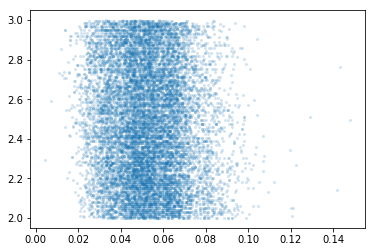

In [81]:
plt.plot(d['z'], d['petroth50'], '.', mec='none', alpha=0.2)

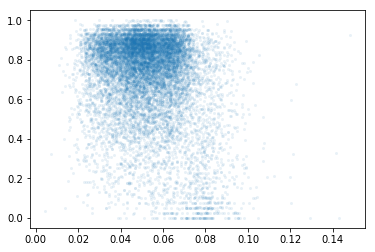

In [31]:
d = d[(d['petroth50'] > 2) & (d['petroth50'] < 3)]
plt.plot(d['z'], d['t01_smooth_or_features_a01_smooth_weight_fraction'], '.', mec='none', alpha=0.1)

In [96]:
gama_data = Table.read('/home/ppzsb1/Dropbox/Work/notebooks/gz_nsa/gama_info.fits')

(-0.0024863905099999995, 0.16312178431, 0, 20)

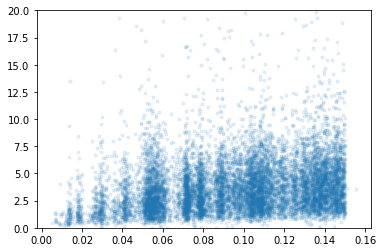

In [104]:
plt.plot(gama_data['Z_TONRY'], gama_data['GALRE_r_kpc'], '.', alpha=0.1)
plt.axis(ymin=0, ymax=20)

(-0.0024863905099999995, 0.16312178431, 0, 20)

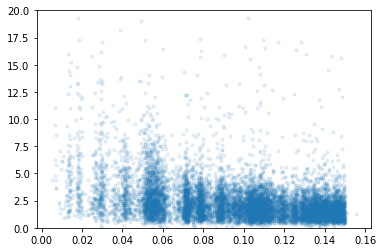

In [105]:
plt.plot(gama_data['Z_TONRY'], gama_data['GALRE_r'], '.', alpha=0.1)
plt.axis(ymin=0, ymax=20)